In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування для відображення графіків всередині блокнота
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [7]:
print("Перші 5 рядків даних: ")
display(df_train.head())

print("\nІнформація про дані (типи та пропуски): ")
df_train.info()

print("\nСтатистика (describe): ")
display(df_train.describe())

Перші 5 рядків даних: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Інформація про дані (типи та пропуски): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Статистика (describe): 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


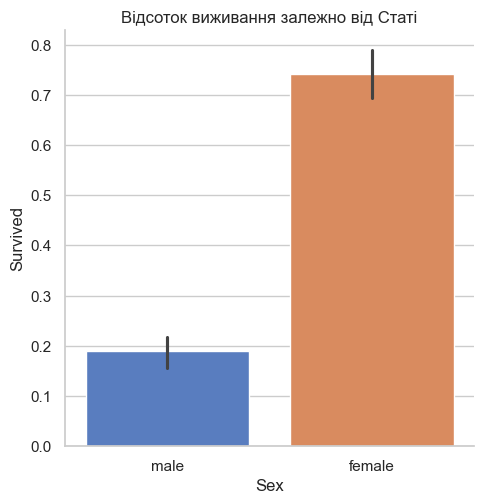

In [11]:

sns.set_theme(style="whitegrid")

# Створюємо стовпчасту діаграму: Pclass (Клас) vs Survived (Вижив)
sns.catplot(x="Sex", y="Survived", data=df_train, kind="bar", palette="muted", hue = "Sex", legend = False)
plt.title('Відсоток виживання залежно від Статі')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_32992\3514593182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Pclass", y="Survived", data=df_train, kind="bar", palette="Set2")


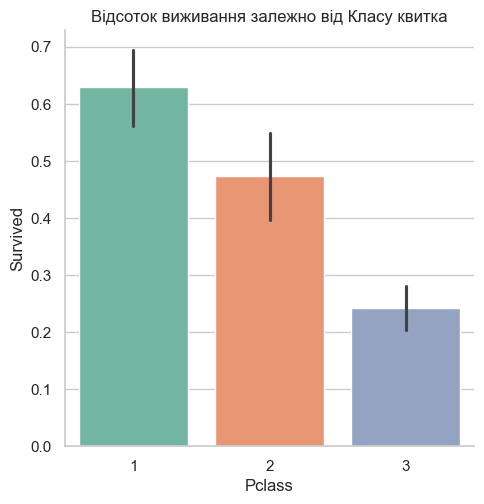

In [12]:
sns.catplot(x="Pclass", y="Survived", data=df_train, kind="bar", palette="Set2")
plt.title('Відсоток виживання залежно від Класу квитка')
plt.show()

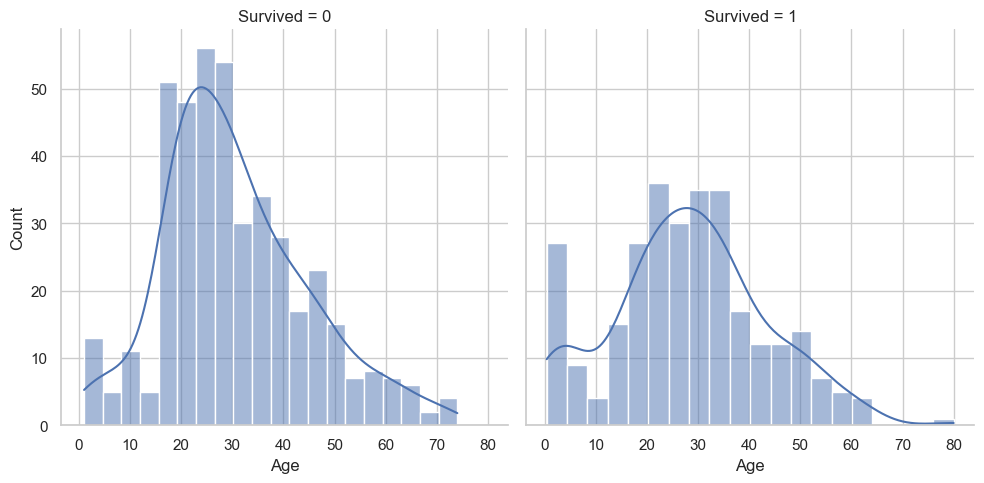

In [16]:
# Створюємо гістограму з накладеним графіком щільності (KDE)
# Ми дивимось, як розподілявся вік (Age) для тих, хто вижив (Survived=1) та тих, хто ні (Survived=0)
g = sns.FacetGrid(df_train, col = "Survived", height = 5)
g.map(sns.histplot, 'Age', kde = True, bins = 20)
plt.show()

In [18]:
# Завантажуємо тестові дані
df_test = pd.read_csv('../data/test.csv')
# Зберігаємо ID пасажирів з тестового набору, вони знадобляться для фінального файлу
test_passenger_ids = df_test['PassengerId']
# (!!) ВАЖЛИВО: Видаляємо непотрібні колонки
# 'PassengerId', 'Name', 'Ticket' - унікальні для кожного і не несуть користі для моделі
# 'Cabin' - занадто багато пропусків (понад 77%), як ми бачили в info()
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

print("Непотрібні колонки видалено.")

Непотрібні колонки видалено.


In [22]:
# 1. Заповнюємо 'Age' (Вік)
# Замість середнього (mean) беремо медіану (50%), вона більш стійка до викидів
median_age = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(median_age)
df_test['Age'] = df_test['Age'].fillna(median_age)
print(f"Проруски 'Age' заповнено медіаною: {median_age}")

# 2. Заповнюємо 'Embarked' (Порт)
# Беремо найчастіше значення (моду)
mode_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'] = df_train['Embarked'].fillna(mode_embarked)
df_test['Embarked'] = df_test['Embarked'].fillna(mode_embarked)
print(f"Проруски 'Embarked' заповнено мoдою: {mode_embarked}")

# 3. Заповнюємо 'Fare' (Ціна квитка) - тільки в тестовому наборі є пропуск
median_fare = df_train['Fare'].median()
df_train['Fare'] = df_train['Fare'].fillna(median_fare)
df_test['Fare'] = df_test['Fare'].fillna(median_fare)
print(f"Проруски 'Fare' заповнено медіаною: {median_fare}")

Проруски 'Age' заповнено медіаною: 28.0
Проруски 'Embarked' заповнено мoдою: S
Проруски 'Fare' заповнено медіаною: 14.4542


In [23]:
# 1. Перетворюємо 'Sex'
# Створюємо словник: 'male' -> 0, 'female' -> 1
sex_mapping = {'male': 0, 'female': 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)
print("Колонка 'Sex' перетворена на числа.")

# 2. Перетворюємо 'Embarked'
# Використовуємо One-Hot Encoding. Це створить 3 нові колонки: Embarked_S, Embarked_C, Embarked_Q
# '1' - якщо пасажир сів у цьому порту, '0' - якщо ні.
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')
print("Колонка 'Embarked' перетворена через One-Hot Encoding.")

# Поглянемо на фінальний результат
print("\nФінальний вигляд даних (перші 5 рядків):")
display(df_train.head())

Колонка 'Sex' перетворена на числа.
Колонка 'Embarked' перетворена через One-Hot Encoding.

Фінальний вигляд даних (перші 5 рядків):


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [26]:
# Імпортуємо все, що потрібно для ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Створюємо X (ознаки): це ВСІ колонки з df_train, КРІМ 'Survived'
X_full = df_train.drop('Survived', axis = 1)

# Створюємо y (ціль): це ТІЛЬКИ колонка 'Survived'
Y_full = df_train['Survived']

# Використовуємо .head() щоб перевірити, що ми все зробили правильно
print("Ознаки (X):")
display(X_full.head())

print("\nЦіль (Y):")
display(Y_full.head())

Ознаки (X):


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,3,0,35.0,0,0,8.0500,False,False,True



Ціль (Y):


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
# Розділяємо наші дані на навчальний "підручник" та "іспит" (валідаційний набір)
# test_size=0.2 означає, що 20% даних піде на "іспит", а 80% - на навчання
# random_state=42 гарантує, що розділення буде однаковим кожного разу, коли ви запускаєте код

X_train, X_val, Y_train, Y_val = train_test_split(X_full, Y_full, test_size = 0.2, random_state = 42)

print(f"Розмір підручника (X_train): {X_train.shape}")
print(f"Розмір іспиту (X_val):     {X_val.shape}")

Розмір підручника (X_train): (712, 9)
Розмір іспиту (X_val):     (179, 9)


In [32]:
# 1. Ініціалізуємо (створюємо) модель
model_logreg = LogisticRegression(max_iter = 1000)

# 2. "Годуємо" модель підручником (X_train, y_train). Це процес навчання.
model_logreg.fit(X_train, Y_train)

# 3. Просимо модель зробити прогноз на "іспиті" (X_val), який вона ніколи не бачила
prediction_logreg = model_logreg.predict(X_val)

# 4. Перевіряємо, наскільки її відповіді збігаються з реальними (y_val)
accuracy_logreg = accuracy_score(Y_val, prediction_logreg)

print(f"Точність Логістичної Регресії на 'іспиті': {accuracy_logreg * 100:.2f}%")

Точність Логістичної Регресії на 'іспиті': 81.01%


In [36]:
# 1. Ініціалізуємо модель
# n_estimators=100 означає, що ми будуємо "ліс" зі 100 дерев
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# 2. Навчаємо на тому ж "підручнику"
model_rf.fit(X_train, Y_train)

# 3. Робимо прогноз на тому ж "іспиті"
predictions_rf = model_rf.predict(X_val)

# 4. Перевіряємо точність
accuracy_rf = accuracy_score(Y_val, predictions_rf)

print(f"Точність Випадкового Лісу на 'іспиті': {accuracy_rf * 100:.2f}%")

Точність Випадкового Лісу на 'іспиті': 81.01%


In [39]:
# Ми обрали Випадковий Ліс як нашу найкращу модель.
# Тепер навчимо її на ВСІХ тренувальних даних (підручник + іспит), щоб дати їй максимум знань
final_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
final_model.fit(X_full, Y_full)
# Тепер робимо прогноз для тих пасажирів з test.csv, яких модель ніколи не бачила.
# (Ми вже підготували df_test на кроці 4)
final_predictions = final_model.predict(df_test)

print("Фінальні прогнози для тестового набору готові.")

Фінальні прогнози для тестового набору готові.


In [44]:
# Створюємо нову таблицю (DataFrame) для результату
# test_passenger_ids - ми зберегли цей список на кроці 4 (Комірка 7)
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': final_predictions
})
# Зберігаємо файл у папку 'results/'
# index=False ВАЖЛИВО: щоб pandas не додав свій власний стовпець з індексами
submission.to_csv('../result/genger_submission.csv', index=False)

print("Файл submission.csv успішно створено у папці 'results'!")
display(submission.head())

Файл submission.csv успішно створено у папці 'results'!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
